In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [52]:
def print_column_statistics(data):
    """ Prints statistics like average, max, and std for each column of the data """
    data_array = np.array(data)
    values = []
    if data_array.shape[0] > 0 and data_array.shape[1] > 0:
        means = np.mean(data_array, axis=0)
        max_vals = np.max(data_array, axis=0)
        std_devs = np.std(data_array, axis=0)

        print("Column Statistics:")
        print(f"{'Column':<10} {'Mean':<10} {'Max':<10} {'Std Dev':<10}")
        print("-" * 40)

        for i in range(data_array.shape[1]):
            print(f"Col {i+1:<6} {means[i]:<10.2f} {max_vals[i]:<10} {std_devs[i]:<10.2f}")
            values.append([means[i], max_vals[i], std_devs[i]])
        return values
    else:
        print("The data is empty or improperly structured.")

def average_matrix(matrix):
    matrix_array = np.array(matrix)
    averaged_matrix = np.mean(matrix_array, axis=0)
    return averaged_matrix


In [53]:

def extract_words_from_line(line):
    """ Extracts the 2nd, 3rd, and 4th words from a line of text """
    words = re.findall(r'\b\w+\b', line)
    
    if len(words) >= 4:
        return words[1], words[2], words[3]
    else:
        return None

def convert_hex_to_decimal(hex_value):
    """ Converts a hexadecimal string to a decimal number """
    try:
        return int(hex_value, 16)
    except ValueError:
        return None

def create_dataset_from_file(file_path):
    """ Reads a file, extracts 2nd, 3rd, and 4th words from each line, converts them from hex to decimal, and creates a dataset """
    dataset = []

    with open(file_path, 'r') as file:
        for line in file:
            words = extract_words_from_line(line.strip())
            if words:
                hex2, hex3, hex4 = words
                dec2 = convert_hex_to_decimal(hex2)
                dec3 = convert_hex_to_decimal(hex3)
                dec4 = convert_hex_to_decimal(hex4)
                
                if dec2 > 5000:
                    dec2 -= 65536
                
                if dec3 > 5000:
                    dec3 -= 65536

                if dec4 > 5000:
                    dec4 -= 65536
                
                if dec2 is not None and dec3 is not None and dec4 is not None:
                    dataset.append((dec2, dec3, dec4))
    
    return dataset

def save_dataset_to_file(dataset, output_path):
    """ Saves the dataset to an output file """
    with open(output_path, 'w') as file:
        for entry in dataset:
            file.write(f'{entry[0]}\t{entry[1]}\t{entry[2]}\n')
        

values_silent = []

for file in os.listdir("silent"):
    dataset = create_dataset_from_file("./silent/" + file)
    values_silent.append(print_column_statistics(dataset))

Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -8.26      5          4.86      
Col 2      0.02       13         4.44      
Col 3      8.22       23         5.01      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -8.23      6          5.38      
Col 2      0.02       13         4.54      
Col 3      8.53       22         5.03      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -7.99      5          4.79      
Col 2      0.07       12         4.26      
Col 3      8.28       20         4.69      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -8.55      5          5.05      
Col 2      -0.01      13         4.36      
Col 3      8.12       21         4.86      
Column Statistics:
Column     Mean       Max        Std 

In [54]:
averaged_matrix = average_matrix(values_silent)

In [55]:
averaged_matrix = average_matrix(values_silent)
print("Column Statistics:")
print(f"{'Column':<10} {'Mean':<10} {'Max':<10} {'Std Dev':<10}")
print("-" * 40)
names = ["Min", "Ave", "Max"]
for i in range(averaged_matrix.shape[1]):
    print(f"{names[i]} \t {averaged_matrix[i][0]:<10.2f} {averaged_matrix[i][1]:<10} {averaged_matrix[i][2]:<10.2f}")


Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Min 	 -8.14      5.5        5.00      
Ave 	 0.04       12.625     4.37      
Max 	 8.21       21.75      4.88      


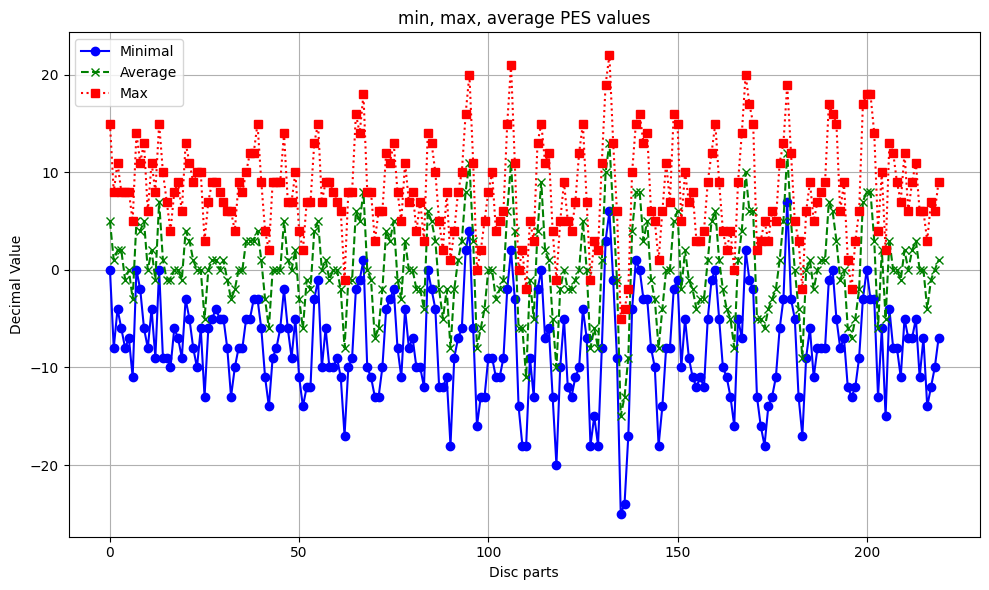

In [56]:
def save_and_plot_dataset(dataset):
    """ Creates a DataFrame from the dataset, saves it, and creates a plot """
    
    df = pd.DataFrame(dataset, columns=['Minimal', 'Average', 'Max'])

    
    
    plt.figure(figsize=(10, 6))

    plt.plot(df.index, df['Minimal'], label='Minimal', marker='o', linestyle='-', color='b')
    plt.plot(df.index, df['Average'], label='Average', marker='x', linestyle='--', color='g')
    plt.plot(df.index, df['Max'], label='Max', marker='s', linestyle=':', color='r')

    plt.xlabel('Disc parts')
    plt.ylabel('Decimal Value')
    plt.title('min, max, average PES values')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

    return df

df = save_and_plot_dataset(dataset)

In [57]:
values_music = []

for file in os.listdir("music"):
    dataset = create_dataset_from_file("./music/" + file)
    values_music.append(print_column_statistics(dataset))

Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -13.39     3          5.91      
Col 2      0.04       13         4.37      
Col 3      13.19      31         5.47      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -13.74     2          6.03      
Col 2      0.01       13         4.29      
Col 3      14.60      31         5.91      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -12.32     3          5.66      
Col 2      -0.01      12         4.34      
Col 3      11.95      29         5.70      
Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Col 1      -12.18     2          5.53      
Col 2      0.08       13         4.47      
Col 3      12.25      26         5.23      
Column Statistics:
Column     Mean       Max        Std 

In [58]:
values_music

[[[-13.39090909090909, 3, 5.906230076707837],
  [0.04090909090909091, 13, 4.369643119493348],
  [13.190909090909091, 31, 5.46725035518596]],
 [[-13.736363636363636, 2, 6.027478400439822],
  [0.013636363636363636, 13, 4.285789993428119],
  [14.6, 31, 5.911006682452661]],
 [[-12.322727272727272, 3, 5.656085364710522],
  [-0.00909090909090909, 12, 4.340078454559957],
  [11.95, 29, 5.704244830905233]],
 [[-12.177272727272728, 2, 5.5334053150085865],
  [0.08181818181818182, 13, 4.472403905531663],
  [12.245454545454546, 26, 5.227003945658916]],
 [[-16.54090909090909, 0, 5.747976647237712],
  [0.08636363636363636, 13, 4.476889692891043],
  [17.26818181818182, 37, 5.988313343021967]],
 [[-15.209090909090909, -1, 5.689856132620346],
  [0.031818181818181815, 12, 4.306853561859955],
  [13.845454545454546, 27, 5.412420671073264]],
 [[-14.4, -1, 5.319261739616266],
  [-0.00909090909090909, 13, 4.485320409240986],
  [14.786363636363637, 27, 5.143822018565347]],
 [[-12.331818181818182, 5, 5.23136401

In [60]:
averaged_matrix = average_matrix(values_music)
print("Column Statistics:")
print(f"{'Column':<10} {'Mean':<10} {'Max':<10} {'Std Dev':<10}")
print("-" * 40)
names = ["Min", "Ave", "Max"]
for i in range(averaged_matrix.shape[1]):
    print(f"{names[i]} \t {averaged_matrix[i][0]:<10.2f} {averaged_matrix[i][1]:<10} {averaged_matrix[i][2]:<10.2f}")


Column Statistics:
Column     Mean       Max        Std Dev   
----------------------------------------
Min 	 -13.76     1.625      5.64      
Ave 	 0.03       12.75      4.41      
Max 	 13.77      29.125     5.50      
